<a href="https://colab.research.google.com/github/jesschannn/datasci_6_anova/blob/main/datasci_6_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting Up

In [ ]:
!pip install ucimlrepo

In [18]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Loading in Dataset and Variables

In [ ]:
# fetch dataset
diabetes_130_us_hospitals_for_years_1999_2008 = fetch_ucirepo(id=296)

In [4]:
# data (as pandas dataframes)
X = diabetes_130_us_hospitals_for_years_1999_2008.data.features
y = diabetes_130_us_hospitals_for_years_1999_2008.data.targets

In [5]:
df2 = pd.DataFrame(X)
df2

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,No
1,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,...,No,No,Up,No,No,No,No,No,Ch,Yes
2,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,...,No,No,No,No,No,No,No,No,No,Yes
3,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,...,No,No,Up,No,No,No,No,No,Ch,Yes
4,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,...,No,No,Steady,No,No,No,No,No,Ch,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,MC,NaN,...,No,No,Down,No,No,No,No,No,Ch,Yes
101762,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,MC,NaN,...,No,No,Steady,No,No,No,No,No,No,Yes
101763,Caucasian,Male,[70-80),NaN,1,1,7,1,MC,NaN,...,No,No,Down,No,No,No,No,No,Ch,Yes
101764,Caucasian,Female,[80-90),NaN,2,3,7,10,MC,Surgery-General,...,No,No,Up,No,No,No,No,No,Ch,Yes


In [6]:
df2.to_csv('diabetes.csv')

## Modified Dataset

In [7]:
df1 = df2[['gender', 'max_glu_serum', 'time_in_hospital']]
df1

,gender,max_glu_serum,time_in_hospital
0,Female,None,1
1,Female,None,3
2,Female,None,2
3,Male,None,2
4,Male,None,1
...,...,...,...
101761,Male,None,3
101762,Female,None,5
101763,Male,None,1
101764,Female,None,10


In [8]:
df = df1.dropna()
df

,gender,max_glu_serum,time_in_hospital
0,Female,None,1
1,Female,None,3
2,Female,None,2
3,Male,None,2
4,Male,None,1
...,...,...,...
101761,Male,None,3
101762,Female,None,5
101763,Male,None,1
101764,Female,None,10


In [9]:
df.to_csv('clean_diabetes.csv')

# Checking Data Type

In [10]:
data_type = df.dtypes
data_type

gender              object
max_glu_serum       object
time_in_hospital     int64
dtype: object

# Markdown Insights

IV 1: gender
- Gender was a variable I picked because certain diseases may affect men and women differently, which can influence how they are diagnosed and treated. Specifically for diabetes, there are differences in the prevalence and incidence of diabetes between men and women, certain hormonal and genetic factors for each gender may contribute to disparities in diabetes risk, and symptoms and signs of diabetes can differ between men and women.

IV 2: max_glu_serum
- Maximum glucose serum was another variable I picked because maximum glucose serum levels are used as a monitoring tool for diabetes. As a monitoring tool, data from maximum glucose serum levels can provide information about glycemic control and if any interventions need to be taken.

DV: time_in_hospital
- Time in hospital was the last variable I picked because the overall goal for hospitals is to reduce the time patients have to spend in the hospital. Hospitals have successfully been able to reduce the amount of time patients spend in a hospital by advancements in diagnostics.

Challenges
- When I initially did the Levene test with a different set of variables, my p-value returned a "NaN" value. I double checked that I dropped all missing values from the dataset, which I had done. Then, I reran the all the code from the top to see if I had missed something, but I was still producing the same "NaN" value for the Levene test. I ended up deleting the entire Colab document and started over from scratch. I was still getting the same result whenever I ran the Levene test, so I ended up picking a different set of variables, which resulted in an actual numerical p-value.

# Checking for Normality

**Interpretation**: Based on the p-value of the stats.shapiro test, the p-value of 0.0 indicates that the data is not normally distributed from the parametrics statistics perspective because the p-value is too low. The histogram further proves this because the data is skewed to the right. Additionally, from a more comprehensive Shapiro-Wilks test, it's observed that the p-values generated from each combination of gender and max_glu_serum produces p-values that are all below 0.05. Therefore, the data is not normally distributed. Another conclusion that can be drawn from the p-value derived from the Shapiro-Wilks test is that gender and maximum glucose serum have a significant effect on a patient's time spent in the hospital.

In [12]:
stats.shapiro(df['time_in_hospital'])

ShapiroResult(statistic=0.8869192600250244, pvalue=0.0)

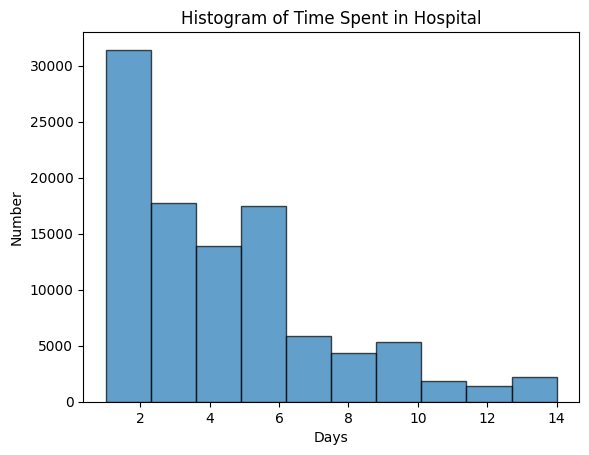

In [13]:
plt.hist(df['time_in_hospital'], bins=10, edgecolor='k', alpha=0.7)
plt.title('Histogram of Time Spent in Hospital')
plt.xlabel('Days')
plt.ylabel('Number')
plt.show()

In [14]:
groups = df.groupby(['gender', 'max_glu_serum'])

for (gender_status, max_glu_serum_status), group_df in groups:
    _, p_value = stats.shapiro(group_df['time_in_hospital'])

    print(f"Group ({gender_status}, {max_glu_serum_status}):")
    print(f"P-value from Shapiro-Wilk Test: {p_value}\n")

Group (Female, >200):
P-value from Shapiro-Wilk Test: 1.2738052328530276e-21

Group (Female, >300):
P-value from Shapiro-Wilk Test: 1.1768474598826276e-15

Group (Female, None):
P-value from Shapiro-Wilk Test: 0.0

Group (Female, Norm):
P-value from Shapiro-Wilk Test: 2.2239057252585333e-30

Group (Male, >200):
P-value from Shapiro-Wilk Test: 4.7388259639670904e-20

Group (Male, >300):
P-value from Shapiro-Wilk Test: 1.030565796334096e-16

Group (Male, None):
P-value from Shapiro-Wilk Test: 0.0

Group (Male, Norm):
P-value from Shapiro-Wilk Test: 1.6725332351183306e-29

Group (Unknown/Invalid, None):
P-value from Shapiro-Wilk Test: 1.3144705723888706e-07



/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


# Homoscedasticity (Equal Variances)

**Interpretation**: The p-value from the Levene Test is ~4.12 * 10 <sup> -11 </sup> , which is less than 0.05. This means that there's a significant difference in variances in the time spent in the hospital, gender, and maximum glucose serum data. This also means that the variances across these three groups are not equal.

In [15]:
stats.levene(
    df['time_in_hospital'][df['gender'] == 'Female'][df['max_glu_serum'] == '>300'],
    df['time_in_hospital'][df['gender'] == 'Male'][df['max_glu_serum'] == '>300'],
    df['time_in_hospital'][df['gender'] == 'Female'][df['max_glu_serum'] == '>200'],
    df['time_in_hospital'][df['gender'] == 'Male'][df['max_glu_serum'] == '>200'],
    df['time_in_hospital'][df['gender'] == 'Female'][df['max_glu_serum'] == 'None'],
    df['time_in_hospital'][df['gender'] == 'Male'][df['max_glu_serum'] == 'None'],
    df['time_in_hospital'][df['gender'] == 'Female'][df['max_glu_serum'] == 'Norm'],
    df['time_in_hospital'][df['gender'] == 'Male'][df['max_glu_serum'] == 'Norm'],

)

LeveneResult(statistic=8.976356359620828, pvalue=4.1246433591964124e-11)

# ANOVA

**Interpretation**: The purpose of the ANOVA test is to allow for a comparison of more than two groups at the same time to determine if there's a relationship between them. If the p-value is less than 0.05, then it means that the independent variable has a significant effect on the dependent variable. On the other hand, if the p-value is greater than 0.05, then it means that the independent variable does not have a significant effect on the dependent variable.

For C(gender), the p-value is 9.999869e-01, which is much greater than the alpha level (0.05). This means that gender does not have a statistically significant impact on the dependent variable.

For C(max_glu_serum), the p-value is 3.658665e-24, which is much smaller than 0.05. Therefore, max_glu_serum is highly significant in predicting the dependent variable.

For C(gender):C(max_glu_serum), the p-value is 1.875794e-01. This p-value is greater than the alpha level of 0.05, indicating that the interaction effect is not statistically significant.

In [16]:
model = ols('time_in_hospital ~ C(gender) * C(max_glu_serum)', data=df).fit()

In [17]:
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                                  sum_sq        df             F        PR(>F)
C(gender)                   4.794263e-09       2.0  2.698080e-10  9.999869e-01
C(max_glu_serum)            1.439131e+03       3.0  5.399357e+01  3.658665e-24
C(gender):C(max_glu_serum)  8.208285e+01       6.0  1.539800e+00  1.875794e-01
Residual                    9.040684e+05  101757.0           NaN           NaN


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 6, but rank is 4
  warnings.warn('covariance of constraints does not have full '


# Post-Hoc Test

**Interpretation**: Based on the Tukey Post-Hoc Test, these groups had significant differences between them:
- Female > 200 vs. Female > 300
- Female > 200 vs. Female None
- Female > 200 vs. Female Norm
- Female > 200 vs. Male None
- Female > 200 vs. Male Norm
- Female > 300 vs. Female None
- Female > 300 vs. Female Norm
- Female > 300 vs. Male > 200
- Female > 300 vs. Male > 300
- Female > 300 vs. Male None
- Female > 300 vs. Male Norm
- Female None vs. Female Norm
- Female None vs. Male > 300
- Female None vs. Male None
- Female None vs. Male Norm
- Male > 200 vs. Male > 300
- Male > 200 vs. Male None
- Male > 200 vs. Male Norm
- Male > 300 vs. Male None
- Male > 300 vs. Male Norm
- Male None vs. Male Norm

## Tukey Post-Hoc Test

In [20]:
tukey_results = pairwise_tukeyhsd(df['time_in_hospital'], df['gender'] + df['max_glu_serum'])
print(tukey_results.summary())

         Multiple Comparison of Means - Tukey HSD, FWER=0.05         
  group1          group2       meandiff p-adj   lower   upper  reject
---------------------------------------------------------------------
Female>200          Female>300   0.8531    0.0   0.374  1.3322   True
Female>200          FemaleNone  -0.3268 0.0522 -0.6552  0.0015  False
Female>200          FemaleNorm  -0.7327    0.0 -1.1416 -0.3239   True
Female>200            Male>200  -0.1183 0.9978 -0.5999  0.3632  False
Female>200            Male>300    0.279   0.74 -0.2268  0.7849  False
Female>200            MaleNone  -0.5009 0.0001 -0.8296 -0.1721   True
Female>200            MaleNorm  -0.9192    0.0 -1.3407 -0.4977   True
Female>200 Unknown/InvalidNone  -1.4629 0.9953 -6.8107  3.8848  False
Female>300          FemaleNone  -1.1799    0.0 -1.5335 -0.8264   True
Female>300          FemaleNorm  -1.5858    0.0 -2.0152 -1.1565   True
Female>300            Male>200  -0.9714    0.0 -1.4705 -0.4724   True
Female>300          